In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"

list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO1O2.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples

list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3a.keys()):
    if event != 'GW190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples

list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3b.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")

GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [3]:
population_model = "PBH-lognormal-1st"
cosmology_model = 'flatLCDM'
outdir = f'H0_GWTC-3_{population_model}_{cosmology_model}_4/'
injections.update_cut(snr_cut=11, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'mc': Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None),
 'σc': Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$log_{fpbh}$', latex_label='$log_{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

20:56 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4/'
20:56 bilby INFO    : Search parameters:
20:56 bilby INFO    :   mc = Uniform(minimum=5.0, maximum=50.0, name='$M_c$', latex_label='$M_c$', unit=None, boundary=None)
20:56 bilby INFO    :   σc = Uniform(minimum=0.1, maximum=2, name='$\\sigma_c$', latex_label='$\\sigma_c$', unit=None, boundary=None)
20:56 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$log_{fpbh}$', latex_label='$log_{fpbh}$', unit=None, boundary=None)
20:56 bilby INFO    :   H0 = 67.4
20:56 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/population.py:56: RuntimeWarning: divide by zero encountered in log
20:56 bilby INFO    : Single likelihood evaluation took 6.134e-02 s


0it [00:00, ?it/s]

20:56 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f373f4c7be0>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
20:56 bilby INFO    : Checkpoint every check_point_delta_t = 60s
20:56 bilby INFO    : Using dynesty version 1.0.1
20:56 bilby INFO    : Using the bilby-implemented rwalk sampl

1721it [02:04, 12.86it/s, bound:0 nc:  4 ncall:1.5e+04 eff:11.7% logz=-1078.51+/-0.14 dlogz:27.604>0.1]    

20:58 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2151it [03:07,  7.97it/s, bound:34 nc: 31 ncall:2.9e+04 eff:7.5% logz=-1069.40+/-0.15 dlogz:17.889>0.1]

20:59 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2598it [04:10,  6.92it/s, bound:83 nc: 34 ncall:4.5e+04 eff:5.8% logz=-1063.97+/-0.15 dlogz:11.593>0.1]

21:00 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2998it [05:12,  6.64it/s, bound:132 nc: 39 ncall:6.0e+04 eff:5.0% logz=-1060.85+/-0.16 dlogz:7.664>0.1]

21:01 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3390it [06:16,  6.37it/s, bound:183 nc: 40 ncall:7.7e+04 eff:4.4% logz=-1058.48+/-0.16 dlogz:4.966>0.1]

21:02 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3779it [07:20,  6.11it/s, bound:235 nc: 80 ncall:9.4e+04 eff:4.0% logz=-1057.07+/-0.16 dlogz:2.831>0.1]

21:03 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:03 bilby INFO    : Writing 170 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4173it [08:24,  6.39it/s, bound:287 nc: 40 ncall:1.1e+05 eff:3.8% logz=-1056.24+/-0.17 dlogz:1.426>0.1]

21:05 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:05 bilby INFO    : Writing 398 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4573it [09:28,  6.48it/s, bound:339 nc: 40 ncall:1.3e+05 eff:3.6% logz=-1055.79+/-0.17 dlogz:0.652>0.1]

21:06 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:06 bilby INFO    : Writing 864 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4972it [10:32,  6.50it/s, bound:391 nc: 40 ncall:1.4e+05 eff:3.5% logz=-1055.56+/-0.17 dlogz:0.285>0.1]

21:07 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:07 bilby INFO    : Writing 1573 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5375it [11:37,  6.56it/s, bound:443 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1055.45+/-0.17 dlogz:0.124>0.1]

21:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:08 bilby INFO    : Writing 1569 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5467it [11:54,  6.05it/s, bound:454 nc: 40 ncall:1.6e+05 eff:3.3% logz=-1055.43+/-0.17 dlogz:0.103>0.1]

21:08 bilby INFO    : Written checkpoint file H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_resume.pickle
21:08 bilby INFO    : Writing 1596 current samples to H0_GWTC-3_PBH-lognormal-1st_flatLCDM_4//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
21:08 bilby INFO    : Starting to close worker pool.
21:08 bilby INFO    : Finished closing worker pool.


5479it [11:56,  7.65it/s, bound:456 nc:  1 ncall:1.6e+05 eff:3.6% logz=-1055.34+/-0.17 dlogz:0.000>0.1]



21:08 bilby INFO    : Sampling time: 0:10:53.406593
21:08 bilby INFO    : Summary of results:
nsamples: 5979
ln_noise_evidence:    nan
ln_evidence: -1055.343 +/-  0.171
ln_bayes_factor:    nan +/-  0.171



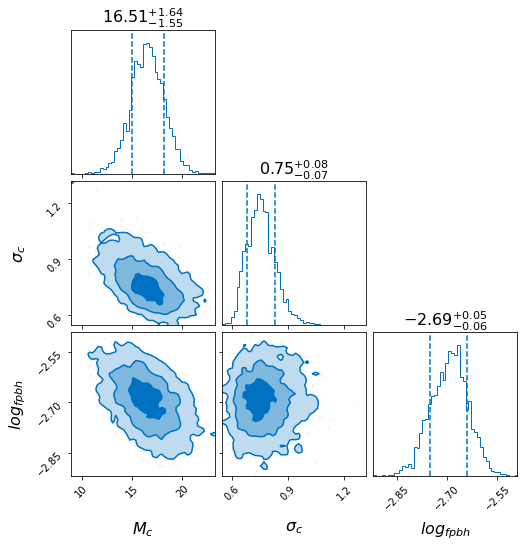

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=32, parallel=2000, check_point_delta_t=60)
result.plot_corner()
